# Analyse de l'intervalle entre commandes des clients

Cette notebook analyse l'intervalle de temps entre les commandes pour chaque client sur la plateforme Olist.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurer le style des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Charger les données
file_path = '../reports/cte/customer_order_interval.csv'
df = pd.read_csv(file_path)

print(f"Nombre de commandes: {len(df)}")
print(f"Nombre de clients: {df['customer_unique_id'].nunique()}")
print(f"Nombre de clients avec au moins 2 commandes: {df[df['days_between_orders'].notna()]['customer_unique_id'].nunique()}")
print(f"Interval moyen entre commandes: {df['days_between_orders'].mean():.2f} jours")

# Afficher les premières lignes
df.head()

Nombre de commandes: 99440
Nombre de clients: 96095
Nombre de clients avec au moins 2 commandes: 2997
Interval moyen entre commandes: 77.86 jours


,customer_unique_id,order_id,order_purchase_timestamp,previous_order_timestamp,days_between_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,NaN,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,NaN,NaN
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,NaN,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,NaN,NaN
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,NaN,NaN


Statistiques des intervalles entre commandes:
count    3345.000000
mean       77.860389
std       107.410890
min         0.000000
25%         0.000000
50%        28.000000
75%       119.000000
max       608.000000
Name: days_between_orders, dtype: float64


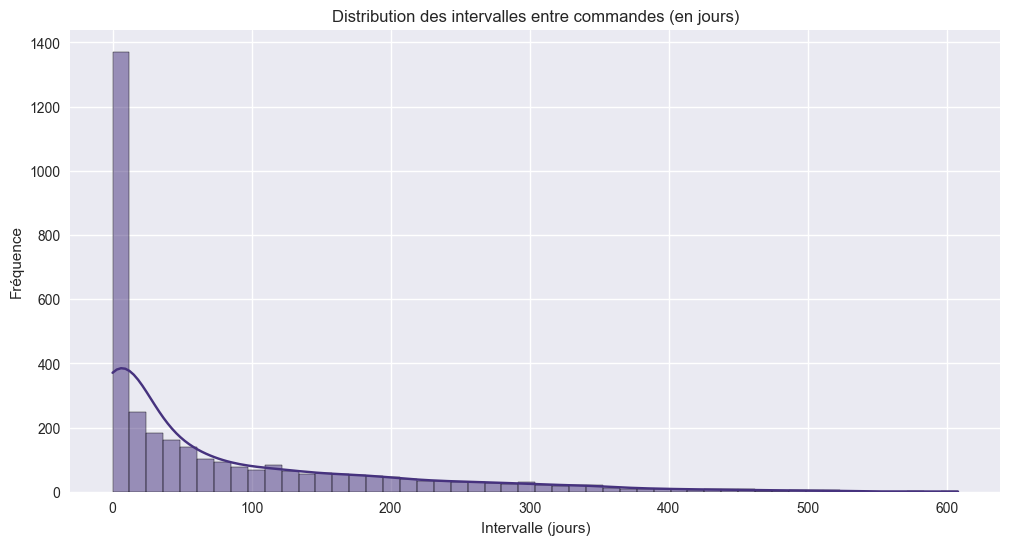

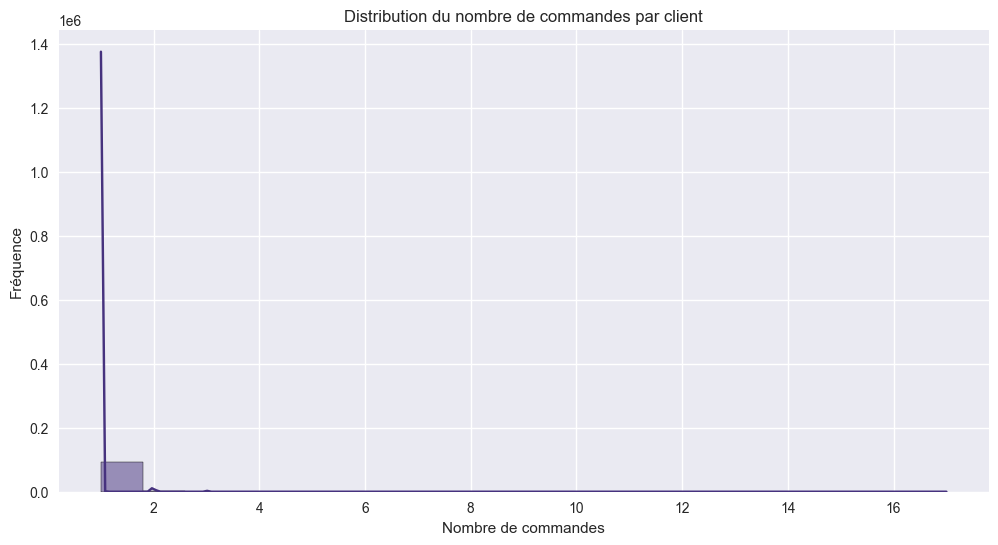

Client avec le plus grand nombre de commandes (17 commandes): 8d50f5eadf50201ccdcedfb9e2ac8455


In [2]:
# Analyser les intervalles de temps entre commandes
interval_stats = df['days_between_orders'].describe()
print("Statistiques des intervalles entre commandes:")
print(interval_stats)

# Visualiser la distribution des intervalles
plt.figure(figsize=(12, 6))
sns.histplot(df['days_between_orders'].dropna(), kde=True, bins=50)
plt.title('Distribution des intervalles entre commandes (en jours)')
plt.xlabel('Intervalle (jours)')
plt.ylabel('Fréquence')
plt.show()

# Visualiser les clients avec le plus grand nombre de commandes
customer_order_count = df['customer_unique_id'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(customer_order_count, kde=True, bins=20)
plt.title('Distribution du nombre de commandes par client')
plt.xlabel('Nombre de commandes')
plt.ylabel('Fréquence')
plt.show()

print(f"Client avec le plus grand nombre de commandes ({customer_order_count.max()} commandes): {customer_order_count.idxmax()}")

Nombre de clients avec au moins 2 commandes: 2997
Interval moyen entre commandes pour les clients répétitifs: 79.72 jours


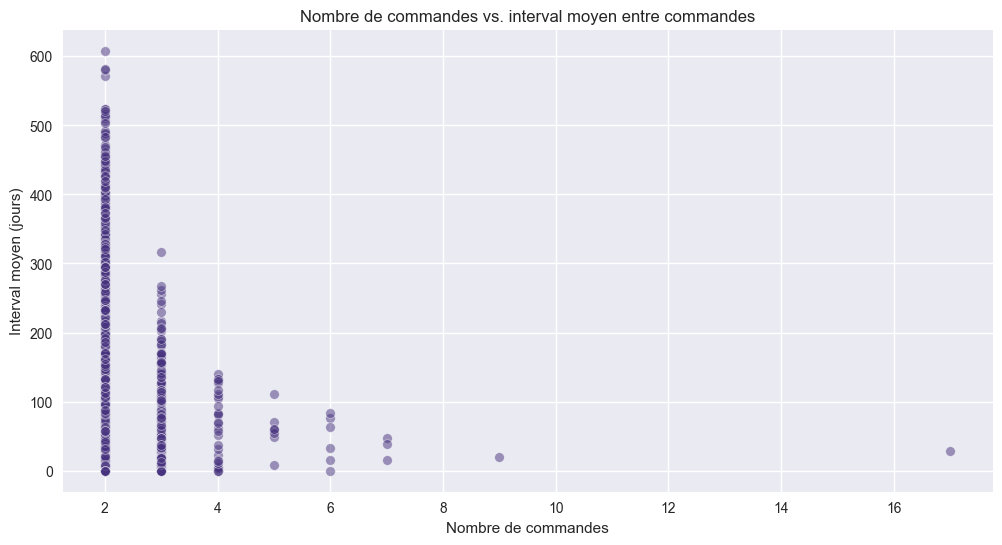

,order_count,avg_interval
customer_unique_id,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,28.375000
3e43e6105506432c953e165fb2acf44c,9,19.875000
1b6c7548a2a1f9037c1fd3ddfed95f33,7,15.166667
6469f99c1f9dfae7733b25662e7f1782,7,46.666667
ca77025e7201e3b30c44b472ff346268,7,38.666667
63cfc61cee11cbe306bff5857d00bfe4,6,76.000000
47c1a3033b8b77b3ab6e109eb4d5fdf3,6,33.600000
12f5d6e1cbf93dafd9dcc19095df0b3d,6,0.000000
de34b16117594161a6a89c50b289d35a,6,14.800000


In [3]:
# Analyser les clients avec des commandes répétées
repeating_customers = df[df['days_between_orders'].notna()][['customer_unique_id', 'days_between_orders']]

# Créer une dataframe avec le nombre de commandes et l'interval moyen par client
customer_summary = df.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'days_between_orders': 'mean'
}).rename(columns={'order_id': 'order_count', 'days_between_orders': 'avg_interval'})

# Filtrer les clients avec au moins 2 commandes
customer_summary = customer_summary[customer_summary['order_count'] >= 2]

print(f"Nombre de clients avec au moins 2 commandes: {len(customer_summary)}")
print(f"Interval moyen entre commandes pour les clients répétitifs: {customer_summary['avg_interval'].mean():.2f} jours")

# Visualiser la relation entre le nombre de commandes et l'interval moyen
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_summary, x='order_count', y='avg_interval', alpha=0.5)
plt.title('Nombre de commandes vs. interval moyen entre commandes')
plt.xlabel('Nombre de commandes')
plt.ylabel('Interval moyen (jours)')
plt.show()

# Afficher les clients avec le plus grand nombre de commandes
customer_summary.sort_values('order_count', ascending=False).head(10)

In [4]:
# Analyser les clients avec des intervalles de temps très courts ou très longs
very_short_intervals = df[df['days_between_orders'] <= 1]
very_long_intervals = df[df['days_between_orders'] >= 365]

print(f"Nombre de commandes avec intervalle <= 1 jour: {len(very_short_intervals)}")
print(f"Clients avec commandes à intervalle <= 1 jour: {very_short_intervals['customer_unique_id'].nunique()}")
print(f"\nNombre de commandes avec intervalle >= 365 jours: {len(very_long_intervals)}")
print(f"Clients avec commandes à intervalle >= 365 jours: {very_long_intervals['customer_unique_id'].nunique()}")

# Visualiser les 10 clients avec les intervalles moyens les plus courts
shortest_avg_intervals = customer_summary.sort_values('avg_interval').head(10)
print("\nTop 10 clients avec les intervalles moyens les plus courts:")
print(shortest_avg_intervals)

# Visualiser les 10 clients avec les intervalles moyens les plus longs
longest_avg_intervals = customer_summary.sort_values('avg_interval', ascending=False).head(10)
print("\nTop 10 clients avec les intervalles moyens les plus longs:")
print(longest_avg_intervals)

Nombre de commandes avec intervalle <= 1 jour: 1042
Clients avec commandes à intervalle <= 1 jour: 996

Nombre de commandes avec intervalle >= 365 jours: 90
Clients avec commandes à intervalle >= 365 jours: 90

Top 10 clients avec les intervalles moyens les plus courts:
                                  order_count  avg_interval
customer_unique_id                                         
6d983c87bdeb0ca15734c8bdaa79a2ea            2           0.0
fafbc4ecb15933633821dfd530c9263b            2           0.0
fad2bf8fa1bdfc125781eb6c62b5ad81            2           0.0
fa0cf5b25732a933725b83d2f716000a            2           0.0
5a2e847dd085d36e3ba8916b75e794ed            2           0.0
f99fa0c7b369bde9c53edc9e6f6c4a58            2           0.0
fd0e843308b676214ea30ea480295e3e            2           0.0
8241424764e0bfa6bfcb3c6cda391ac8            2           0.0
0396c443fdda5498c7e9ed5b34871c5a            2           0.0
822d25972056ef51050804f1e0446f40            2           0.0

Top 10 c

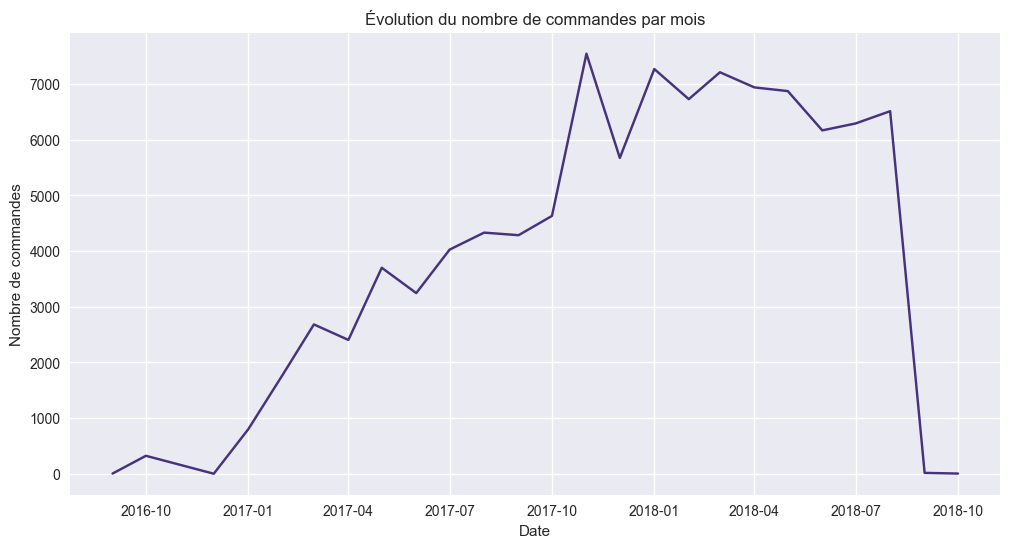

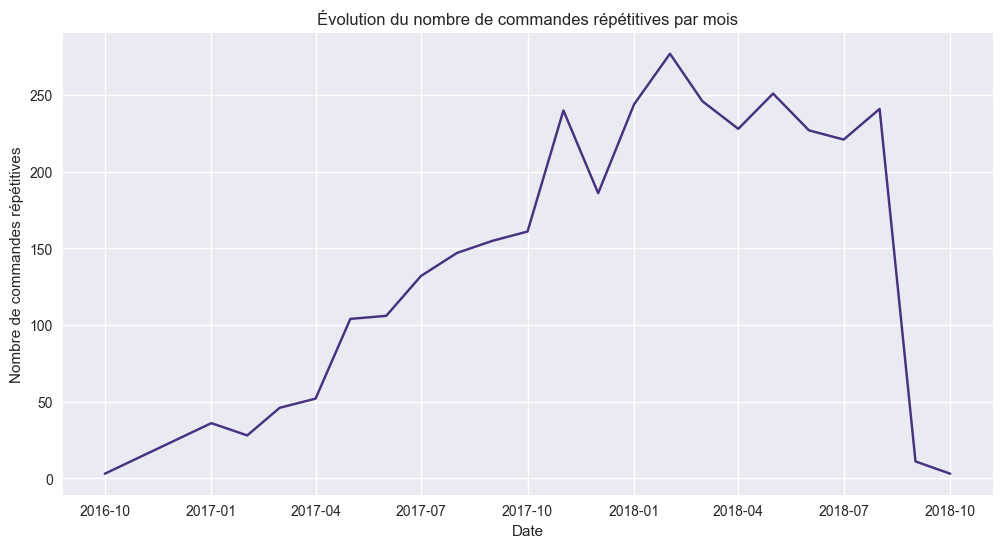

Pourcentage de commandes répétitives: 3.36%


In [5]:
# Analyser l'évolution temporelle des commandes
# Convertir les dates de commande en datetime
for col in ['order_purchase_timestamp', 'previous_order_timestamp']:
    df[col] = pd.to_datetime(df[col])

# Créer une dataframe avec le nombre de commandes par mois
monthly_orders = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).size().reset_index(name='count')
monthly_orders['order_purchase_timestamp'] = monthly_orders['order_purchase_timestamp'].dt.to_timestamp()

# Visualiser l'évolution du nombre de commandes par mois
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='order_purchase_timestamp', y='count')
plt.title('Évolution du nombre de commandes par mois')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.show()

# Analyser le nombre de clients répétitifs par mois
repeating_orders = df[df['days_between_orders'].notna()]
monthly_repeating = repeating_orders.groupby(repeating_orders['order_purchase_timestamp'].dt.to_period('M')).size().reset_index(name='count')
monthly_repeating['order_purchase_timestamp'] = monthly_repeating['order_purchase_timestamp'].dt.to_timestamp()

# Visualiser l'évolution du nombre de commandes répétitives par mois
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_repeating, x='order_purchase_timestamp', y='count')
plt.title('Évolution du nombre de commandes répétitives par mois')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes répétitives')
plt.show()

print(f"Pourcentage de commandes répétitives: {len(repeating_orders)/len(df)*100:.2f}%")

In [6]:
# Analyser les clients qui ont commandé plusieurs fois dans le même jour
multiple_orders_same_day = df[df['days_between_orders'] == 0]

print(f"Nombre de commandes le même jour: {len(multiple_orders_same_day)}")
print(f"Clients qui ont commandé le même jour: {multiple_orders_same_day['customer_unique_id'].nunique()}")

# Afficher les détails des commandes le même jour
if not multiple_orders_same_day.empty:
    print("\nDétails des commandes le même jour:")
    display(multiple_orders_same_day[['customer_unique_id', 'order_id', 'order_purchase_timestamp']])

Nombre de commandes le même jour: 999
Clients qui ont commandé le même jour: 956

Détails des commandes le même jour:


,customer_unique_id,order_id,order_purchase_timestamp
318,00cc12a6d8b578b8ebd21ea4e2ae8b27,d61b915b69851aec8a8865f36cfd793e,2017-03-21 19:25:23
651,01a22e2079ea71e17313b88e5811e54a,7f40591eeef659da2bc93d2735fa9476,2018-01-22 23:27:48
745,01ea7dfdac01a4e8fbe2902b73510b20,6cd2700e3e9fc015e3bbe4ee264af57b,2018-02-09 17:36:45
935,027803eb28cc01fbdf5da72b109fabee,b2fc720676930e0f9f3c1e472e8cddad,2017-10-17 11:28:18
1019,02b20b7c813efede140142ac610e36dc,25ce3a22fa2537206c22c8bef4f9b593,2018-03-19 20:50:39
...,...,...,...
98724,fe28d443ab89dc67f5858bc2beda299a,171c9f9a5667b0bea55d8b78c27bc5bd,2017-07-18 09:57:34
98806,fe613188d4d20ea3e3dc1290549c3ad1,3e677665a6566b610e6f1344ade7b146,2017-11-20 12:47:30
98970,fed2005ccab4fcf1a40ebdaff032a148,02b0bf9164ac7753f9880e46dba17f6c,2017-06-17 17:04:31
99150,ff44401d0d8f5b9c54a47374eb48c1b8,c087855fe6f303205c09558f7f8103c8,2017-05-19 21:20:54


In [7]:
# Analyser les clients avec des paternes de commandes réguliers
# Identifier les clients avec au moins 3 commandes
customers_with_3_orders = customer_summary[customer_summary['order_count'] >= 3]

print(f"Clients avec au moins 3 commandes: {len(customers_with_3_orders)}")

# Analyser la variance des intervalles pour ces clients
customers_with_3_orders['interval_variance'] = df[df['customer_unique_id'].isin(customers_with_3_orders.index)].groupby('customer_unique_id')['days_between_orders'].var()

# Afficher les clients avec les intervalles les plus réguliers (plus faible variance)
regular_customers = customers_with_3_orders.sort_values('interval_variance').head(10)
print("\nTop 10 clients avec les intervalles les plus réguliers:")
print(regular_customers)

# Afficher les clients avec les intervalles les moins réguliers (plus grande variance)
irregular_customers = customers_with_3_orders.sort_values('interval_variance', ascending=False).head(10)
print("\nTop 10 clients avec les intervalles les moins réguliers:")
print(irregular_customers)

Clients avec au moins 3 commandes: 252

Top 10 clients avec les intervalles les plus réguliers:
                                  order_count  avg_interval  interval_variance
customer_unique_id                                                            
06a52782a04f0086d16b9c22d0e29438            3           0.0                0.0
12f5d6e1cbf93dafd9dcc19095df0b3d            6           0.0                0.0
0e4cb268bd62da7db135af6349b4fc2a            3           0.0                0.0
25f3cf83109f636d52d288fa4e797111            3           0.0                0.0
25a560b9a6006157838aab1bdbd68624            4           0.0                0.0
2e43e031f10de28e557c35ef668f9396            3           0.0                0.0
46958f708ade6b6a88b2e5aca1e66de5            3           0.0                0.0
6222ef69df52b4ed71be551725551cc0            3           0.0                0.0
66980c3775537536f77b434d74e520f5            3           0.0                0.0
6a80a86f478a93a5f4c7ba8db6441a6b   

C:\Users\B2AI\AppData\Local\Temp\ipykernel_17304\3001637207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_with_3_orders['interval_variance'] = df[df['customer_unique_id'].isin(customers_with_3_orders.index)].groupby('customer_unique_id')['days_between_orders'].var()


## Conclusion

L'analyse de l'intervalle entre commandes révèle plusieurs informations clés:

1. **Petit pourcentage de clients répétitifs**: Seuls 3% des clients (2997 sur 99440) ont passé plus d'une commande.

2. **Intervalle moyen élevé**: L'intervalle moyen entre deux commandes est de 77.86 jours, ce qui indique que les clients de Olist ont une tendance à commander occasionnellement plutôt que régulièrement.

3. **Distribution des intervalles**: La distribution des intervalles est très asymétrique, avec une majorité de commandes répétitives avec des intervalles inférieurs à 30 jours, mais une longue queue d'intervalles plus longs.

4. **Clients fidèles**: Un petit nombre de clients (quelques dizaines) ont passé un grand nombre de commandes, avec une moyenne de 4 à 10 commandes par client.

5. **Commandes le même jour**: Quelques clients ont passé plusieurs commandes le même jour, ce qui pourrait être dû à des achats multiples ou des erreurs.

Ces informations sont importantes pour comprendre le comportement des clients et développer des stratégies de rétention et de fidélisation.